In [1]:
import numpy as np
import pandas as pd
import os

In [4]:
os.getcwd()

'F:\\python\\数据清洗课程材料\\练习代码'

In [2]:
os.chdir(r'F:\\python\\数据清洗课程材料\\代码和数据')

In [3]:
df = pd.read_csv('MotorcycleData.csv',encoding = 'gbk',na_values='Na')

摩托车的销售情况数据：
- Condition：摩托车新旧情况（new：新的 和used：使用过的）
- Condition_Desc：对当前状况的描述
- Price：价格
- Location：发获地址
- Model_Year：购买年份
- Mileage：里程
- Exterior_Color：车的颜色
- Make：制造商（牌子）
- Warranty：保修
- Model：类型
- Sub_Model：车辆类型
- Type：种类
- Vehicle_Title：车辆主题
- OBO：车辆仪表盘
- Watch_Count：表数
- N_Reviews：评测次数
- Seller_Status：卖家身份
- Auction：拍卖（Ture或者False）
- Buy_Now:现买
- Bid_Count：出价计数

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 22 columns):
Condition         7493 non-null object
Condition_Desc    1656 non-null object
Price             7493 non-null object
Location          7491 non-null object
Model_Year        7489 non-null float64
Mileage           7467 non-null object
Exterior_Color    6778 non-null object
Make              7489 non-null object
Warranty          5108 non-null object
Model             7370 non-null object
Sub_Model         2426 non-null object
Type              6011 non-null object
Vehicle_Title     268 non-null object
OBO               7427 non-null object
Feedback_Perc     6611 non-null object
Watch_Count       3517 non-null object
N_Reviews         7487 non-null object
Seller_Status     6868 non-null object
Vehicle_Tile      7439 non-null object
Auction           7476 non-null object
Buy_Now           7256 non-null object
Bid_Count         2190 non-null float64
dtypes: float64(2), object(20)
mem

In [5]:
df.shape

(7493, 22)

In [6]:
df.head(5)

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
0,Used,mint!!! very low miles,"$11,412","McHenry, Illinois, United States",2013.0,"16,000",Black,Harley-Davidson,Unspecified,Touring,...,NaN,FALSE,8.1,NaN,2427,Private Seller,Clear,True,FALSE,28.0
1,Used,Perfect condition,"$17,200","Fort Recovery, Ohio, United States",2016.0,60,Black,Harley-Davidson,Vehicle has an existing warranty,Touring,...,NaN,FALSE,100,17,657,Private Seller,Clear,True,TRUE,0.0
2,Used,NaN,"$3,872","Chicago, Illinois, United States",1970.0,"25,763",Silver/Blue,BMW,Vehicle does NOT have an existing warranty,R-Series,...,NaN,FALSE,100,NaN,136,NaN,Clear,True,FALSE,26.0
3,Used,CLEAN TITLE READY TO RIDE HOME,"$6,575","Green Bay, Wisconsin, United States",2009.0,"33,142",Red,Harley-Davidson,NaN,Touring,...,NaN,FALSE,100,NaN,2920,Dealer,Clear,True,FALSE,11.0
4,Used,NaN,"$10,000","West Bend, Wisconsin, United States",2012.0,"17,800",Blue,Harley-Davidson,NO WARRANTY,Touring,...,NaN,FALSE,100,13,271,OWNER,Clear,True,TRUE,0.0


# 重复值处理
对价格和里程数数据进行处理

In [7]:
#自定义一个函数
def f(x):
    if '$' in str(x):
        x = str(x).strip('$')
        x = str(x).replace(',', '')
    else:
        x = str(x).replace(',', '')
    return float(x)

In [8]:
df['Price'] = df['Price'].apply(f)

In [9]:
df['Mileage'] = df['Mileage'].apply(f)

In [10]:
df.head(5)

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
0,Used,mint!!! very low miles,11412.0,"McHenry, Illinois, United States",2013.0,16000.0,Black,Harley-Davidson,Unspecified,Touring,...,NaN,FALSE,8.1,NaN,2427,Private Seller,Clear,True,FALSE,28.0
1,Used,Perfect condition,17200.0,"Fort Recovery, Ohio, United States",2016.0,60.0,Black,Harley-Davidson,Vehicle has an existing warranty,Touring,...,NaN,FALSE,100,17,657,Private Seller,Clear,True,TRUE,0.0
2,Used,NaN,3872.0,"Chicago, Illinois, United States",1970.0,25763.0,Silver/Blue,BMW,Vehicle does NOT have an existing warranty,R-Series,...,NaN,FALSE,100,NaN,136,NaN,Clear,True,FALSE,26.0
3,Used,CLEAN TITLE READY TO RIDE HOME,6575.0,"Green Bay, Wisconsin, United States",2009.0,33142.0,Red,Harley-Davidson,NaN,Touring,...,NaN,FALSE,100,NaN,2920,Dealer,Clear,True,FALSE,11.0
4,Used,NaN,10000.0,"West Bend, Wisconsin, United States",2012.0,17800.0,Blue,Harley-Davidson,NO WARRANTY,Touring,...,NaN,FALSE,100,13,271,OWNER,Clear,True,TRUE,0.0


In [18]:
print ('数据集是否存在重复观测: \n', any(df.duplicated()))

数据集是否存在重复观测: 
 True


In [23]:
df.duplicated?

In [25]:
#查看那些数据重复
df[df.duplicated(keep='first')]

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
57,Used,NaN,4050.0,"Gilberts, Illinois, United States",2006.0,6650.0,Black,Harley-Davidson,Vehicle does NOT have an existing warranty,Softail,...,NaN,FALSE,NaN,7<,58,Private Seller,Clear,True,TRUE,3.0
63,Used,NaN,7300.0,"Rolling Meadows, Illinois, United States",1997.0,20000.0,Black,Harley-Davidson,Vehicle does NOT have an existing warranty,Sportster,...,NaN,TRUE,100,5<,111,Private Seller,Clear,False,TRUE,NaN
64,Used,Dent and scratch free. Paint and chrome in exc...,5000.0,"South Bend, Indiana, United States",2003.0,1350.0,Black,Harley-Davidson,Vehicle does NOT have an existing warranty,Sportster,...,NaN,FALSE,100,14,37,Private Seller,Clear,False,TRUE,NaN
67,Used,NaN,3250.0,"Valparaiso, Indiana, United States",2003.0,22896.0,Blue/Green Metallic,Harley-Davidson,Vehicle does NOT have an existing warranty,Sportster,...,NaN,FALSE,100,9<,109,Private Seller,Clear,True,TRUE,11.0
103,Used,NaN,10995.0,"Delafield, Wisconsin, United States",2002.0,4185.0,Blue,Harley-Davidson,Vehicle does NOT have an existing warranty,Other,...,NaN,FALSE,100,NaN,91,Private Seller,Clear,False,TRUE,NaN
152,Used,SLING SHOT SL LIMITED EDITION!! BLACK WITH RED...,17000.0,"Plainfield, Illinois, United States",2016.0,11703.0,BLACK DIAMOND,Other Makes,Vehicle has an existing warranty,SLINGSHOT,...,NaN,TRUE,100,31,390,Dealer,Clear,False,TRUE,NaN
155,Used,NaN,6950.0,"Schenectady, New York, United States",2006.0,65100.0,Burgundy,Harley-Davidson,Vehicle does NOT have an existing warranty,Touring,...,NaN,FALSE,100,8<,1028,Dealer,Clear,False,TRUE,NaN
156,Used,NaN,19600.0,"Pierre, South Dakota, United States",2012.0,25976.0,NaN,Harley-Davidson,Vehicle has an existing warranty,Touring,...,NaN,FALSE,100,NaN,40,NaN,Clear,True,FALSE,59.0
157,Used,NaN,49441.0,"Gastonia, North Carolina, United States",2017.0,770.0,SILVER,Harley-Davidson,Vehicle has an existing warranty,Touring,...,NaN,FALSE,100,19,1016,Dealer,Clear,False,TRUE,NaN
201,Used,NaN,2247.0,"Shawano, Wisconsin, United States",1976.0,13161.0,Brown,Kawasaki,Vehicle does NOT have an existing warranty,KZ,...,NaN,FALSE,100,NaN,9,Private Seller,Clear,True,FALSE,15.0


In [26]:
#计算重复数量
np.sum(df.duplicated())

1221

In [29]:
#删除所有变量都重复的行, 注意没有加inplace = True
df.drop_duplicates().shape

(6272, 22)

In [31]:
#按照两个变量重复来来去重
df.drop_duplicates(subset=['Condition', 'Condition_Desc', 'Price', 'Location']).shape

(5356, 22)

# 缺失值处理

In [32]:
#缺失比例
df.apply(lambda x: sum(x.isnull())/len(x),axis= 0) 

Condition         0.000000
Condition_Desc    0.778994
Price             0.000000
Location          0.000267
Model_Year        0.000534
Mileage           0.003470
Exterior_Color    0.095422
Make              0.000534
Warranty          0.318297
Model             0.016415
Sub_Model         0.676231
Type              0.197785
Vehicle_Title     0.964233
OBO               0.008808
Feedback_Perc     0.117710
Watch_Count       0.530629
N_Reviews         0.000801
Seller_Status     0.083411
Vehicle_Tile      0.007207
Auction           0.002269
Buy_Now           0.031630
Bid_Count         0.707727
dtype: float64

## 删除法

In [33]:
df.dropna?

In [34]:
df.dropna() #直接删除法

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count


In [36]:
#只要有缺失，就删除这一列
df.dropna(how='any',axis = 1 ).head(5)

,Condition,Price
0,Used,11412.0
1,Used,17200.0
2,Used,3872.0
3,Used,6575.0
4,Used,10000.0


In [37]:
#只要有缺失，就删除这一行，等价于df.dropna()
df.dropna(how='any', axis=0)

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count


axis = 0 或者 1代表的函数在数据集作用的方向，0代表沿着行的方向，1代表沿着列的方向

In [40]:
# 1代表列，0代表行，只要有缺失，就删除这一行,基于三个变量
df.dropna(axis = 0,how='any',subset=['Condition','Price','Mileage']).shape

(7467, 22)

## 替换法

In [41]:
df.head(5)

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
0,Used,mint!!! very low miles,11412.0,"McHenry, Illinois, United States",2013.0,16000.0,Black,Harley-Davidson,Unspecified,Touring,...,NaN,FALSE,8.1,NaN,2427,Private Seller,Clear,True,FALSE,28.0
1,Used,Perfect condition,17200.0,"Fort Recovery, Ohio, United States",2016.0,60.0,Black,Harley-Davidson,Vehicle has an existing warranty,Touring,...,NaN,FALSE,100,17,657,Private Seller,Clear,True,TRUE,0.0
2,Used,NaN,3872.0,"Chicago, Illinois, United States",1970.0,25763.0,Silver/Blue,BMW,Vehicle does NOT have an existing warranty,R-Series,...,NaN,FALSE,100,NaN,136,NaN,Clear,True,FALSE,26.0
3,Used,CLEAN TITLE READY TO RIDE HOME,6575.0,"Green Bay, Wisconsin, United States",2009.0,33142.0,Red,Harley-Davidson,NaN,Touring,...,NaN,FALSE,100,NaN,2920,Dealer,Clear,True,FALSE,11.0
4,Used,NaN,10000.0,"West Bend, Wisconsin, United States",2012.0,17800.0,Blue,Harley-Davidson,NO WARRANTY,Touring,...,NaN,FALSE,100,13,271,OWNER,Clear,True,TRUE,0.0


In [64]:
# 行程量用均值填补
df.Mileage.fillna(df.Mileage.mean())
#用中位数填补
df.Mileage.fillna(df.Mileage.median(), inplace=False)
#查看缺失值
df[df['Mileage'].isnull()].head(5)
#众数填补
df.Mileage.fillna(df.Mileage.mode()[0])
df.Mileage.mode()
#所有缺失值用20填补
df.Mileage.fillna(20)

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
1602,Used,NaN,3950.0,"Tallahassee, Florida, United States",1991.0,NaN,Red,Harley-Davidson,Vehicle does NOT have an existing warranty,Touring,...,NaN,TRUE,100,NaN,1011,Private Seller,Clear,False,TRUE,NaN
1691,Used,NaN,7500.0,"Salem, Oregon, United States",1962.0,NaN,Gold,Harley-Davidson,NaN,Sprint,...,NaN,TRUE,9.8,21,48244,Private Seller,Clear,False,TRUE,NaN
1711,Used,NaN,7500.0,"Salem, Oregon, United States",1962.0,NaN,Gold,Harley-Davidson,NaN,Sprint,...,NaN,TRUE,9.8,21,48244,Private Seller,Clear,False,TRUE,NaN
2347,Used,Features:2008 Yamaha RoadStar One Off Billet W...,21500.0,"Henderson, Tennessee, United States",2008.0,NaN,2016 Mercedes Silver,Yamaha,NaN,Other,...,NaN,FALSE,8.9,1<,423,Private Seller,Clear,False,TRUE,NaN
2530,Used,NaN,7500.0,"San Diego, California, United States",2005.0,NaN,NaN,Honda,NaN,CRF,...,NaN,FALSE,100,NaN,51,NaN,Clear,True,FALSE,0.0


In [53]:
np.sum(df.isnull())

Condition            0
Condition_Desc    5837
Price                0
Location             2
Model_Year           4
Mileage             26
Exterior_Color     715
Make                 4
Warranty          2385
Model              123
Sub_Model         5067
Type              1482
Vehicle_Title     7225
OBO                 66
Feedback_Perc      882
Watch_Count       3976
N_Reviews            6
Seller_Status      625
Vehicle_Tile        54
Auction             17
Buy_Now            237
Bid_Count         5303
dtype: int64

In [55]:
df.isnull?

In [56]:
df.duplicated?

In [59]:
df[df['Location'].isnull()]

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,Vehicle_Title,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count
230,New,NaN,25000.0,NaN,2016.0,1300.0,Black,Harley-Davidson,Vehicle has an existing warranty,Touring,...,NaN,FALSE,NaN,NaN,7,Private Seller,Clear,True,FALSE,0.0
912,Used,Runs good,5450.0,NaN,1980.0,40000.0,Burgundy,Harley-Davidson,Vehicle does NOT have an existing warranty,Street,...,NaN,TRUE,100,9<,819,Private Seller,Clear,False,TRUE,NaN


In [ ]:
# 颜色使用众数,里程数使用均值
df.fillna(value={
    'Exterior_Color': df.Exterior_Color.mode()[0],
    'Mileage': df.Mileage.mean()
})

In [ ]:
#前向填补
df.Exterior_Color.fillna(method='ffill')
#后向填补
df.Exterior_Color.fillna(method='bfill')

# 异常值处理
异常值检测可以使用均值的2倍标准差范围，也可以使用上下4分位数差方法

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 22 columns):
Condition         7493 non-null object
Condition_Desc    1656 non-null object
Price             7493 non-null float64
Location          7491 non-null object
Model_Year        7489 non-null float64
Mileage           7467 non-null float64
Exterior_Color    6778 non-null object
Make              7489 non-null object
Warranty          5108 non-null object
Model             7370 non-null object
Sub_Model         2426 non-null object
Type              6011 non-null object
Vehicle_Title     268 non-null object
OBO               7427 non-null object
Feedback_Perc     6611 non-null object
Watch_Count       3517 non-null object
N_Reviews         7487 non-null object
Seller_Status     6868 non-null object
Vehicle_Tile      7439 non-null object
Auction           7476 non-null object
Buy_Now           7256 non-null object
Bid_Count         2190 non-null float64
dtypes: float64(4), object(18)
m

In [69]:
df.apply(lambda x: sum(x.isnull()) / len(x), axis=0)

Condition         0.000000
Condition_Desc    0.778994
Price             0.000000
Location          0.000267
Model_Year        0.000534
Mileage           0.003470
Exterior_Color    0.095422
Make              0.000534
Warranty          0.318297
Model             0.016415
Sub_Model         0.676231
Type              0.197785
Vehicle_Title     0.964233
OBO               0.008808
Feedback_Perc     0.117710
Watch_Count       0.530629
N_Reviews         0.000801
Seller_Status     0.083411
Vehicle_Tile      0.007207
Auction           0.002269
Buy_Now           0.031630
Bid_Count         0.707727
dtype: float64

In [71]:
df.dropna(axis=0, how='any', subset=['Mileage']).shape

(7467, 22)

In [72]:
# 异常值检测之标准差法
xbar = df.Price.mean()
xstd = df.Price.std()
print('标准差法异常值上限检测：\n', any(df.Price > xbar + 2.5 * xstd))
print('标准差法异常值下限检测：\n', any(df.Price < xbar - 2.5 * xstd))

标准差法异常值上限检测：
 True
标准差法异常值下限检测：
 False


In [73]:
# 异常值检测之箱线图法
Q1 = df.Price.quantile(q = 0.25)
Q3 = df.Price.quantile(q = 0.75)
IQR = Q3 - Q1

print('箱线图法异常值上限检测：\n',any(df.Price > Q3 + 1.5 * IQR))
print('箱线图法异常值下限检测：\n',any(df.Price < Q1 - 1.5 * IQR))

箱线图法异常值上限检测：
 True
箱线图法异常值下限检测：
 False


In [74]:
# 进行描述性统计
df.Price.describe()

count      7493.000000
mean       9968.811557
std        8497.326850
min           0.000000
25%        4158.000000
50%        7995.000000
75%       13000.000000
max      100000.000000
Name: Price, dtype: float64

In [76]:
df.Price.describe(percentiles=[0.2, 0.8])

count      7493.000000
mean       9968.811557
std        8497.326850
min           0.000000
20%        3500.000000
50%        7995.000000
80%       14999.000000
max      100000.000000
Name: Price, dtype: float64

%matplotlib inline是jupyter notebook里的命令, 意思是将那些用matplotlib绘制的图显示在页面里而不是弹出一个窗口,并且可以省略掉plt.show()这一步。

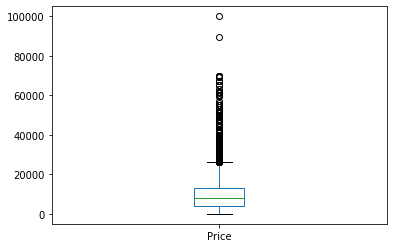

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
df.Price.plot(kind='box')

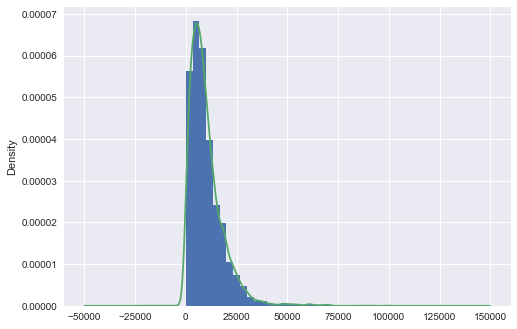

In [13]:
# 导入绘图模块
import matplotlib.pyplot as plt
%matplotlib inline
# 设置绘图风格
plt.style.use('seaborn')
# 绘制直方图
df.Price.plot(kind='hist', bins=30, density=True)
# 绘制核密度图
df.Price.plot(kind='kde')
# 图形展现
plt.show()

In [14]:
# 用99分位数和1分位数替换
#计算P1和P99
P1 = df.Price.quantile(0.01)
P99 = df.Price.quantile(0.99)
#先创建一个新变量，进行赋值，然后将满足条件的数据进行替换
df['Price_new'] = df['Price']
df.loc[df['Price'] > P99,'Price_new']  = P99
df.loc[df['Price'] < P1,'Price_new']  = P1

In [14]:
df[['Price','Price_new']].describe()

,Price,Price_new
count,7493.000000,7493.000000
mean,9968.811557,9821.220873
std,8497.326850,7737.092537
min,0.000000,100.000000
25%,4158.000000,4158.000000
50%,7995.000000,7995.000000
75%,13000.000000,13000.000000
max,100000.000000,39995.320000


# 数据离散化

- pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)
- 参数：
- x，类array对象，且必须为一维，待切割的原形式
- bins, 整数、序列尺度、或间隔索引。如果bins是一个整数，它定义了x宽度范围内的等宽面元数量，但是在这种情况下，x的范围在每个边上被延长1%，以保证包括x的最小值或最大值。如果bin是序列，它定义了允许非均匀bin宽度的bin边缘。在这种情况下没有x的范围的扩展。
- right,布尔值。是否是左开右闭区间，right=True,左开右闭,right=False,左闭右开
- labels,用作结果箱的标签。必须与结果箱相同长度。如果FALSE，只返回整数指标面元。
- retbins,布尔值。是否返回面元
- precision，整数。返回面元的小数点几位
- include_lowest，布尔值。第一个区间的左端点是否包含

In [95]:
pd.cut?

In [15]:
df.head(5)

,Condition,Condition_Desc,Price,Location,Model_Year,Mileage,Exterior_Color,Make,Warranty,Model,...,OBO,Feedback_Perc,Watch_Count,N_Reviews,Seller_Status,Vehicle_Tile,Auction,Buy_Now,Bid_Count,Price_new
0,Used,mint!!! very low miles,11412.0,"McHenry, Illinois, United States",2013.0,16000.0,Black,Harley-Davidson,Unspecified,Touring,...,FALSE,8.1,NaN,2427,Private Seller,Clear,True,FALSE,28.0,11412.0
1,Used,Perfect condition,17200.0,"Fort Recovery, Ohio, United States",2016.0,60.0,Black,Harley-Davidson,Vehicle has an existing warranty,Touring,...,FALSE,100,17,657,Private Seller,Clear,True,TRUE,0.0,17200.0
2,Used,NaN,3872.0,"Chicago, Illinois, United States",1970.0,25763.0,Silver/Blue,BMW,Vehicle does NOT have an existing warranty,R-Series,...,FALSE,100,NaN,136,NaN,Clear,True,FALSE,26.0,3872.0
3,Used,CLEAN TITLE READY TO RIDE HOME,6575.0,"Green Bay, Wisconsin, United States",2009.0,33142.0,Red,Harley-Davidson,NaN,Touring,...,FALSE,100,NaN,2920,Dealer,Clear,True,FALSE,11.0,6575.0
4,Used,NaN,10000.0,"West Bend, Wisconsin, United States",2012.0,17800.0,Blue,Harley-Davidson,NO WARRANTY,Touring,...,FALSE,100,13,271,OWNER,Clear,True,TRUE,0.0,10000.0


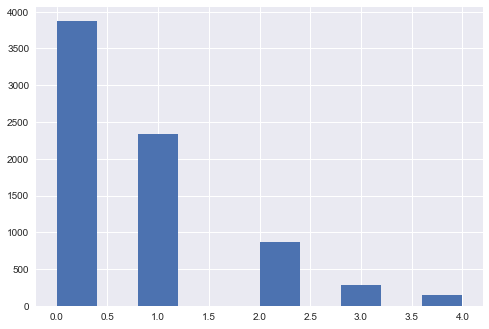

In [16]:
df['Price_bin'] =  pd.cut(df['Price_new'],5,labels=range(5))
df['Price_bin'].hist()

In [106]:
df['Price_new'].describe()

count     7493.000000
mean      9821.220873
std       7737.092537
min        100.000000
25%       4158.000000
50%       7995.000000
75%      13000.000000
max      39995.320000
Name: Price_new, dtype: float64

In [17]:
w = [100, 1000, 5000, 10000, 20000, 50000]
df['Price_bin'] = pd.cut(df['Price_new'],
                         bins=w,
                         labels=['低', '便宜', '划算', '中等', '高'],
                         right=False)
df['Price_bin'].value_counts()

划算    2389
中等    2095
便宜    1886
高      748
低      375
Name: Price_bin, dtype: int64

pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates=’raise’)
- 参数：
- x 
- q, 整数 或分位数数组 整数比如 4 代表 按照4分位数 进行切割 
- labels, 用作结果箱的标签。必须与结果箱相同长度。如果FALSE，只返回整数指标面元。

- 原理都是基于分位数来进行离散化

(1300, 1600)

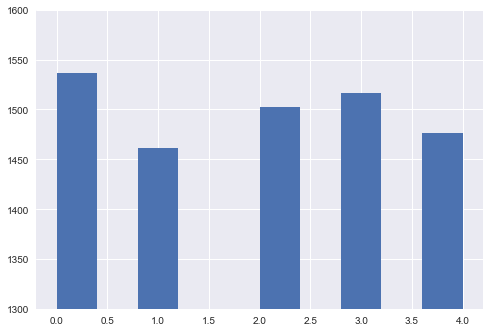

In [20]:
k = 5
w = [1.0*i/k for i in range(k+1)] 
w
df['Price_bin'] = pd.qcut(df['Price_new'],w,labels=range(k))
df['Price_bin'].hist()
plt.ylim(1300,1600)

In [22]:
#先计算分位数的值
k = 5
w1 = df['Price_new'].quantile([1.0*i/k for i in range(k+1)])#先计算分位数,在进行分段
w1[0] = w1[0]* 0.98 # 最小值缩小一点
w[-1] = w1[1]* 1.02 # 将最大值增大一点, 目的是为了确保数据在这个范围内
w1

0.0       98.00
0.2     3500.00
0.4     6491.00
0.6     9777.00
0.8    14999.00
1.0    39995.32
Name: Price_new, dtype: float64

(1350, 1600)

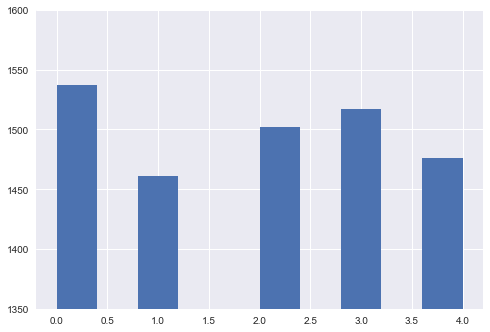

In [24]:
df['Price_bin'] = pd.cut(df['Price_new'],w1,labels=range(k))
df['Price_bin'].hist()
plt.ylim(1350,1600)